In [3]:
# 필요한 패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 150

# 데이터 로드
data = pd.read_csv('Seoul_real_estate_trade_info.csv', encoding='cp949')

/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_21068/4168070895.py:10: DtypeWarning: Columns (7,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Seoul_real_estate_trade_info.csv', encoding='cp949')


In [29]:
# 데이터 살펴보기
data.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11590,동작구,10200,상도동,1.0,대지,175.0,27.0,모던힐타운2차,...,40000,43.64,27.49,4.0,NaN,NaN,2015.0,연립다세대,중개거래,서울 동작구
1,2023,11140,중구,15600,입정동,1.0,대지,189.0,1.0,힐스테이트 세운 센트럴 1단지,...,32550,25.07,0.00,20.0,분양권,NaN,0.0,아파트,직거래,NaN
2,2023,11530,구로구,11000,온수동,1.0,대지,86.0,10.0,에코그린빌,...,29500,43.91,35.11,5.0,NaN,NaN,2019.0,연립다세대,직거래,NaN
3,2023,11230,동대문구,10400,전농동,1.0,대지,620.0,47.0,청량리역 롯데캐슬 SKY-L65,...,109000,84.97,0.00,13.0,분양권,NaN,0.0,아파트,중개거래,서울 동대문구
4,2023,11410,서대문구,11200,대현동,1.0,대지,37.0,32.0,영타운 지웰 에스테이트,...,16000,19.39,30.27,9.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 마포구


In [30]:
# 데이터 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651626 entries, 0 to 2651625
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   접수연도              int64  
 1   자치구코드             int64  
 2   자치구명              object 
 3   법정동코드             int64  
 4   법정동명              object 
 5   지번구분              float64
 6   지번구분명             object 
 7   본번                object 
 8   부번                float64
 9   건물명               object 
 10  계약일               int64  
 11  물건금액(만원)          int64  
 12  건물면적(㎡)           float64
 13  토지면적(㎡)           float64
 14  층                 float64
 15  권리구분              object 
 16  취소일               float64
 17  건축년도              float64
 18  건물용도              object 
 19  신고구분              object 
 20  신고한 개업공인중개사 시군구명  object 
dtypes: float64(7), int64(5), object(9)
memory usage: 424.8+ MB


# 접수 연도별 거래가

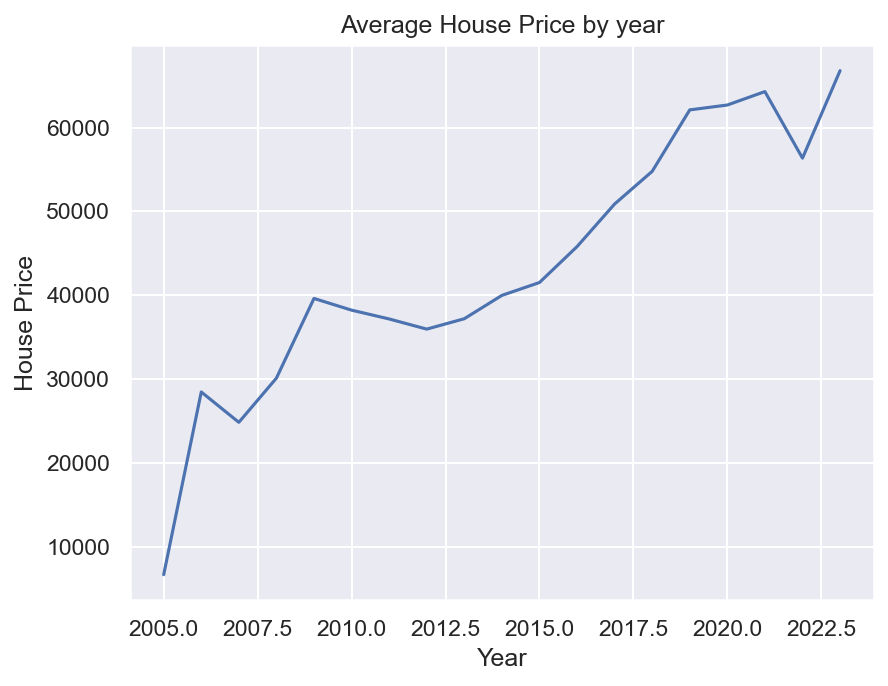

In [66]:
# 접수 연도별 거래가
mean_price_by_year = data.groupby(data['접수연도'])['물건금액(만원)'].mean()

# 그래프 그리기
plt.plot(mean_price_by_year.index, mean_price_by_year.values)
plt.title('Average House Price by year')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.show()

- 해가 증가 할 수록 거래가가 늘어나는 걸 확인
- 집값이 잠깐 감소하는 구간이 있긴 하지만 우상향 그래프

# 관계 속성 확인

/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_4616/300732869.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr(),
/Users/min/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/Users/min/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/min/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


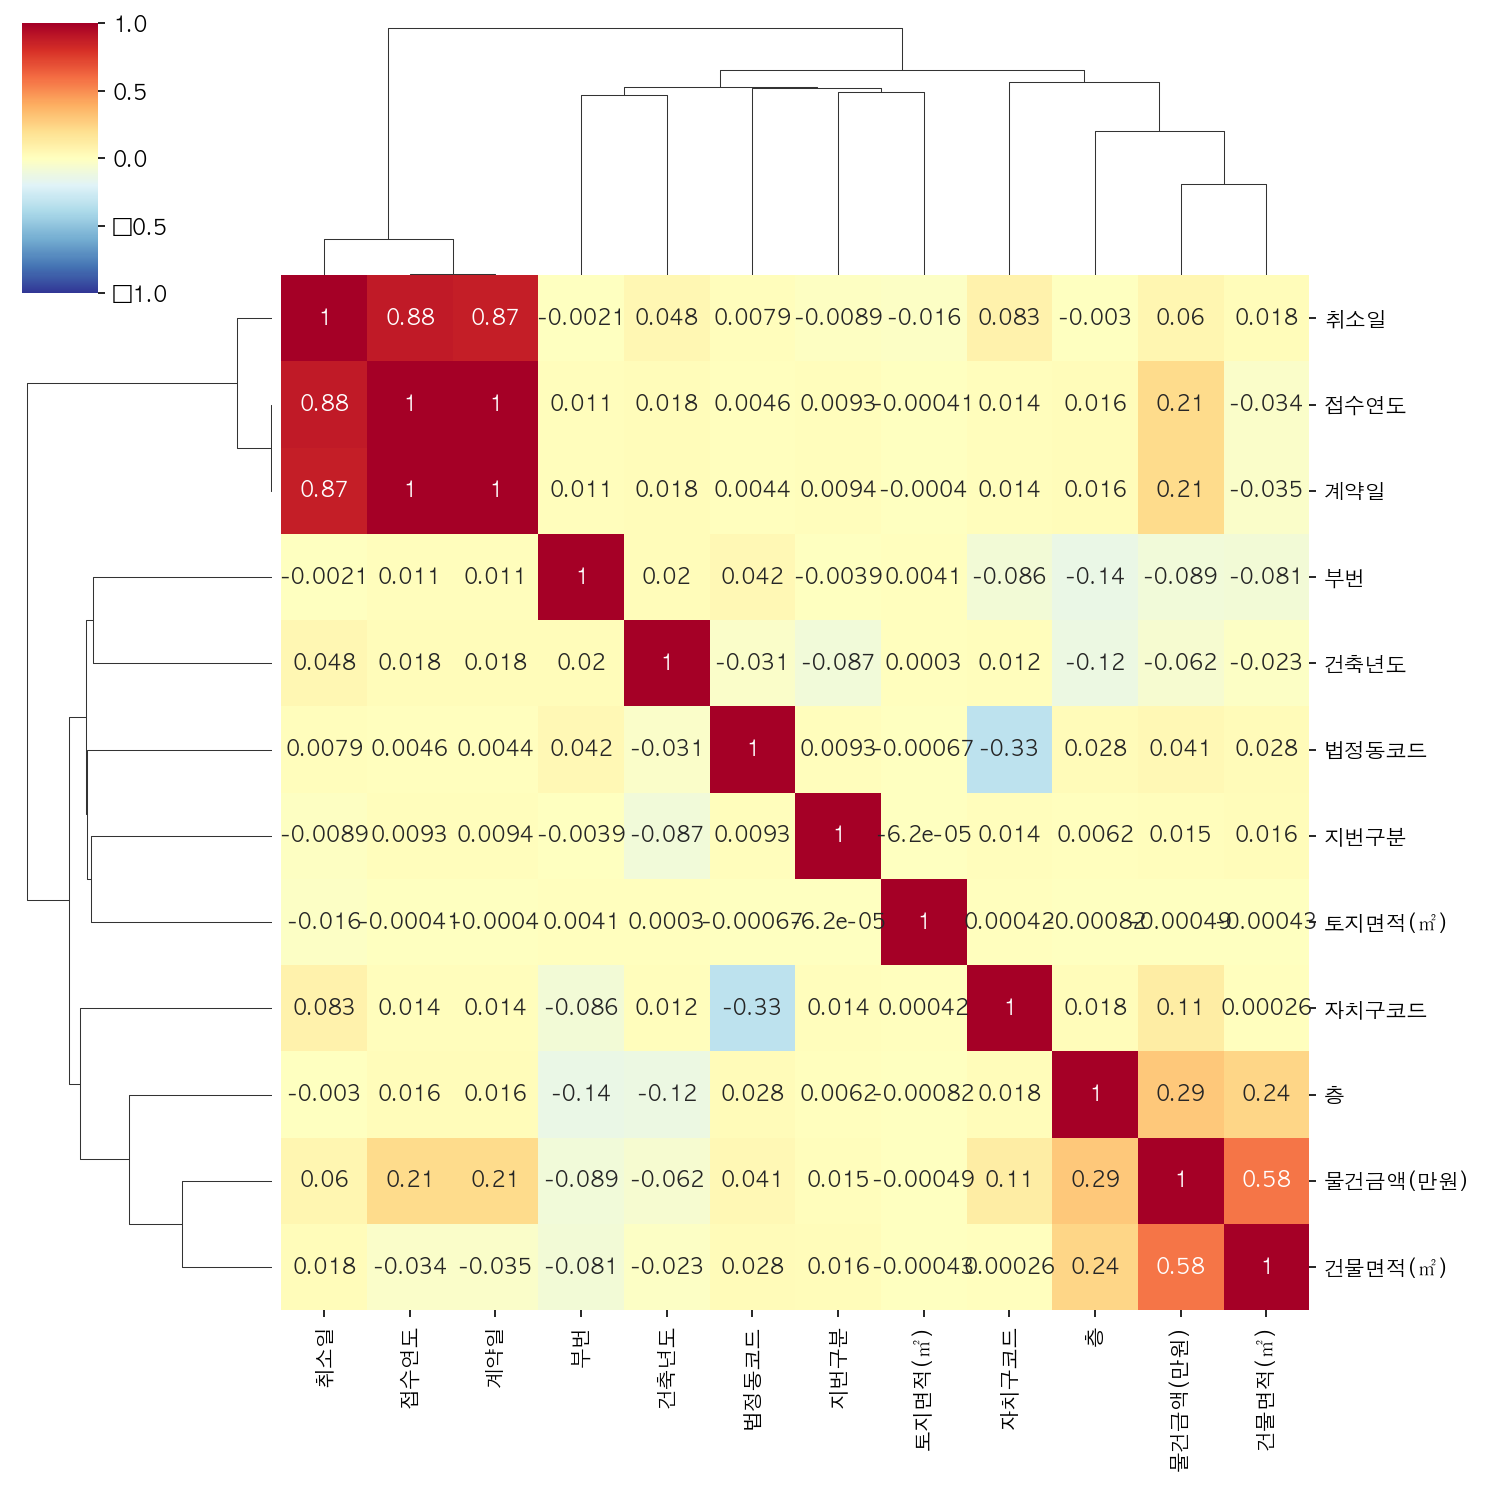

In [38]:
# 히트맵 시각화
plt.rcParams['font.family'] = 'AppleGothic'
sns.clustermap(data.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )

- 취소일, 접수연도, 계약일을 제외하고 엄청 큰 상관관계는 없었음
- 층, 건물 면적, 물건금액(집값)은 어느정도 연관성이 있었음

# 건물 면적과 집값 관련성 시각화

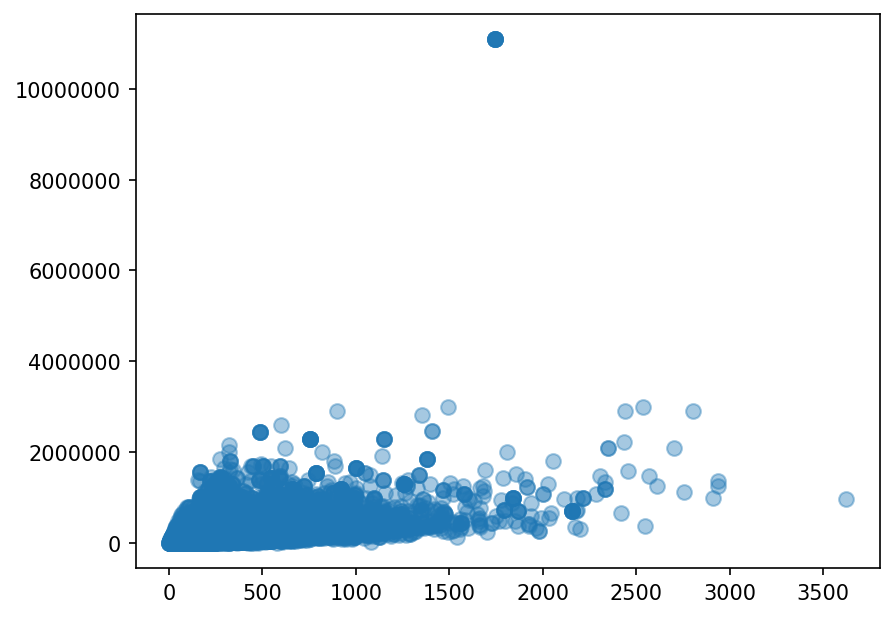

In [32]:
plt.scatter(data['건물면적(㎡)'], data['물건금액(만원)'], s = 50, alpha = 0.4)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

- 히트맵을 보았을 때 가장 높은 상관관계를 가진 건물면적과 물건금액(집값)을 시각화
- 가장 높은 상관관계를 가졌지만 객관적으로 서로 굉장히 유사하지는 않다는 것을 보여줌
- 물건금액(집값)은 건물면적과 다른 요소(층, 지역 등)들이 종합적으로 영향을 끼쳐 결정된다는 것을 추론

# 층 별 집값 시각화

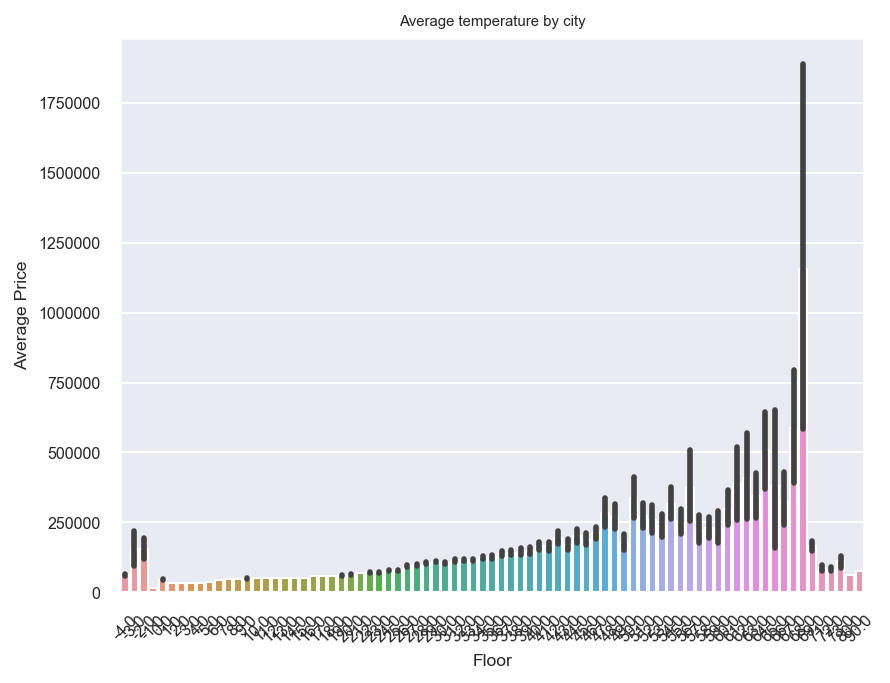

In [76]:
# 층 별 물건금액 bar plot 시각화

sns.barplot(x="층", y="물건금액(만원)", data=data)
sns.set(font_scale=0.6)
plt.xlabel('Floor')
plt.ylabel('Average Price')
plt.title("Average temperature by city")
plt.xticks(rotation=45) #x축 회전
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

- 층별로 건물가격을 확인해보았을 때, 68층이 가장 비싼 가격, 지하1층이 가장 싼 가격대를 보임
- 68층의 건물 명을 확인 해본 결과, 롯데월드타워앤드롯데월드몰, 현대 하이페리온, 타워펠리스 등 비싼 가격의 건물을 확인할 수 있었음
- 반대로 지하 1층의 건물 명을 확인 해본 결과, 빌라가 대부분이였고 대부분의 빌라에는 반지하가 있어 싼 가격인 것으로 추정됨

# 지도 시각화

## 자치구별 집값 지도 시각화

In [1]:
import folium

total_price_by_gu = data.groupby('자치구명')['물건금액(만원)'].mean().reset_index()

seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data='HangJeongDong_ver20230101.json',  # 구별 경계 데이터
    name='choropleth',
    data=total_price_by_gu,
    columns=['자치구명', '물건금액(만원)'],
    key_on='feature.properties.sggnm',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='거래금액(만원)'
).add_to(seoul_map)

# 지도 저장
seoul_map

NameError: name 'data' is not defined

- 구별로 집값 시각화를 해보았을때, 순서대로
- 강남구, 송파구, 서초구, 강서구, 강동구, 마포구, 양천구, 용산구, 노원구, 동작구, 은평구, 성북구, 영등포구, 성동구, 구로구, 관악구, 광진구, 동대문구, 서대문구, 중랑구, 도봉구, 강북구, 종로구, 금천구, 중구 순으로 비쌌다.
- 가장 비싼곳은 강남구, 가장 싼곳은 중구
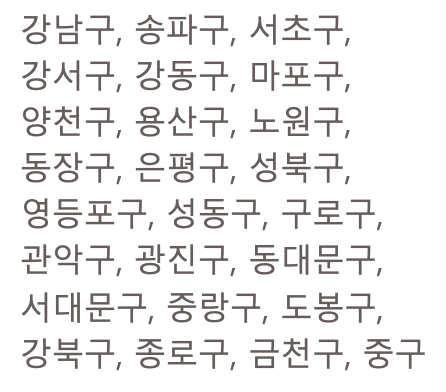

## 법정동별 집값 지도 시각화

## 법정동별 평균

In [95]:
import folium

mean_price_by_dong = data.groupby('법정동명')['물건금액(만원)'].mean().reset_index()

seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data='HangJeongDong_ver20230101.json',  # 구별 경계 데이터
    name='choropleth',
    data=mean_price_by_dong,
    columns=['법정동명', '물건금액(만원)'],
    key_on='feature.properties.temp',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='거래금액(만원)'
).add_to(seoul_map)

# 지도 저장
seoul_map

- 동별로 집값 시각화를 해보았을 때,
- 평균으로 보았을 때, 가장 비싼 동은 명동1가, 가장 싼 동은 관철동

## 법정동별 합계

In [96]:
import folium

total_price_by_dong = data.groupby('법정동명')['물건금액(만원)'].sum().reset_index()

seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data='HangJeongDong_ver20230101.json',  # 구별 경계 데이터
    name='choropleth',
    data=total_price_by_dong,
    columns=['법정동명', '물건금액(만원)'],
    key_on='feature.properties.temp',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='거래금액(만원)'
).add_to(seoul_map)

# 지도 저장
seoul_map.save('map.html')

- Total로 보았을 때는
- 가장 비싼 곳은 반포동, 가장 싼 곳은 충청로 1가
- 동이다 보니 데이터가 부족한게 보임

# 계약달에 따른 거래량 변화

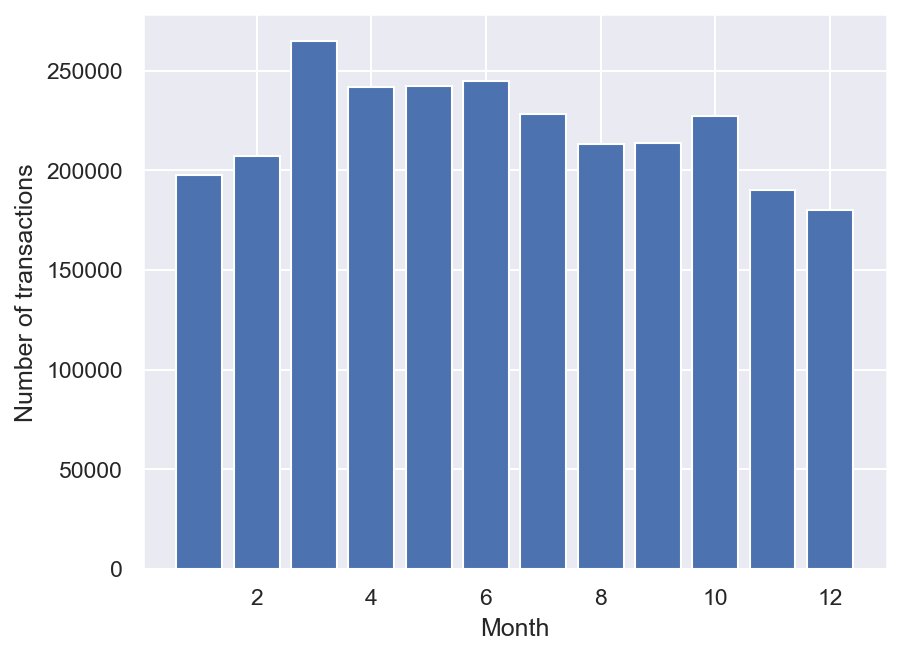

In [53]:
# 계약일을 날짜 형식으로 변환
data['계약일'] = pd.to_datetime(data['계약일'], format='%Y%m%d')

# 각 달의 거래 수 계산
counts_by_month = data.groupby(data['계약일'].dt.month)['계약일'].count()

# 막대 그래프로 시각화
plt.bar(counts_by_month.index, counts_by_month.values)
sns.set(font_scale=1.0)
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.show()


- 가장 계약 건수가 많은 달은 3월, 적은달은 12월이였음

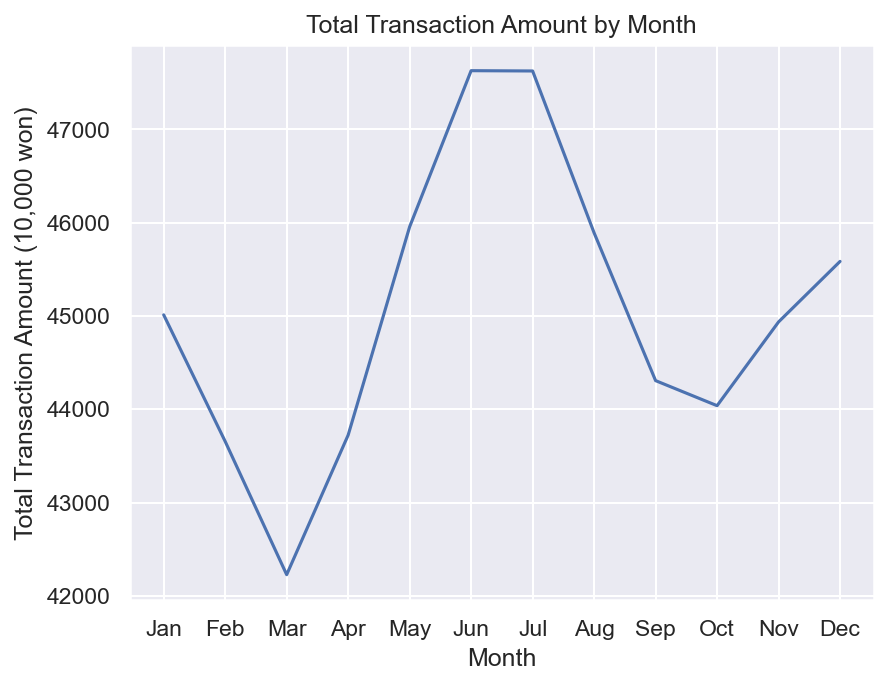

In [65]:
data['month'] = data['계약일'].dt.month

# Group the data by month and calculate the total transaction amount
monthly_total = data.groupby('month')['물건금액(만원)'].mean()

# Plot the data
fig, ax = plt.subplots()
ax.plot(monthly_total.index, monthly_total.values)

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Total Transaction Amount (10,000 won)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('Total Transaction Amount by Month')
sns.set(font_scale=1.0)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

plt.show()

- 계약건수가 물건금액(집값)과 연관이 있나 확인
- 3월에 가장 많이 집값이 떨어졌고 6월과 8월이 가장 비싼 가격을 보이고 있음
- 3월에 가장 수요가 많다보니 거래량은 많아지고 그래서 가격이 떨어지는 것을 추론